<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(0_8)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,47.932337,61.695426,1.685052,121.312814,119.674737,1.638077
1,0.0,1.0,94.576837,49.903058,-3.588225,150.891670,156.624918,-5.733248
2,0.0,2.0,49.653907,75.130889,-3.912849,130.871947,134.586190,-3.714243
3,0.0,3.0,61.812069,34.932094,3.596627,110.340790,107.956980,2.383810
4,0.0,4.0,75.943694,94.234593,8.191582,188.369869,180.562525,7.807345
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,97.418971,54.634843,2.573084,164.626898,166.324506,-1.697608
19996,999.0,16.0,94.916803,45.824545,1.732650,152.473998,154.478547,-2.004549
19997,999.0,17.0,72.862703,54.218434,-1.050048,136.031090,139.305053,-3.273963
19998,999.0,18.0,60.240310,63.252928,14.831048,148.324286,135.007822,13.316464


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    47.932337  61.695426   1.685052  121.312814  119.674737   
      1.0    94.576837  49.903058  -3.588225  150.891670  156.624918   
      2.0    49.653907  75.130889  -3.912849  130.871947  134.586190   
      3.0    61.812069  34.932094   3.596627  110.340790  107.956980   
      4.0    75.943694  94.234593   8.191582  188.369869  180.562525   
...                ...        ...        ...         ...         ...   
999.0 15.0   97.418971  54.634843   2.573084  164.626898  166.324506   
      16.0   94.916803  45.824545   1.732650  152.473998  154.478547   
      17.0   72.862703  54.218434  -1.050048  136.031090  139.305053   
      18.0   60.240310  63.252928  14.831048  148.324286  135.007822   
      19.0   73.590691  83.853926   5.245453  172.690071  170.827044   

                 e_hat  
rep   index             
0.0   0.0     1.638077  
      1.0    -5.733248  
      2.0    -3.714243  
      3.0     2.383810  
      4.0     7.807345  
...                ...  
999.0 15.0   -1.697608  
      16.0   -2.004549  
      17.0   -3.273963  
      18.0   13.316464  
      19.0    1.863027  

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    47.932337  61.695426   1.685052  121.312814  119.674737   
      1.0    94.576837  49.903058  -3.588225  150.891670  156.624918   
      2.0    49.653907  75.130889  -3.912849  130.871947  134.586190   
      3.0    61.812069  34.932094   3.596627  110.340790  107.956980   
      4.0    75.943694  94.234593   8.191582  188.369869  180.562525   
...                ...        ...        ...         ...         ...   
999.0 15.0   97.418971  54.634843   2.573084  164.626898  166.324506   
      16.0   94.916803  45.824545   1.732650  152.473998  154.478547   
      17.0   72.862703  54.218434  -1.050048  136.031090  139.305053   
      18.0   60.240310  63.252928  14.831048  148.324286  135.007822   
      19.0   73.590691  83.853926   5.245453  172.690071  170.827044   

                 e_hat  
rep   index             
0.0   0.0     1.638077  
      1.0    -5.733248  
      2.0    -3.714243  
      3.0     2.383810  
      4.0     7.807345  
...                ...  
999.0 15.0   -1.697608  
      16.0   -2.004549  
      17.0   -3.273963  
      18.0   13.316464  
      19.0    1.863027  

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,47.932337,61.695426,1.685052,121.312814,119.674737,1.638077
1,0.0,1.0,94.576837,49.903058,-3.588225,150.891670,156.624918,-5.733248
2,0.0,2.0,49.653907,75.130889,-3.912849,130.871947,134.586190,-3.714243
3,0.0,3.0,61.812069,34.932094,3.596627,110.340790,107.956980,2.383810
4,0.0,4.0,75.943694,94.234593,8.191582,188.369869,180.562525,7.807345
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,97.418971,54.634843,2.573084,164.626898,166.324506,-1.697608
19996,999.0,16.0,94.916803,45.824545,1.732650,152.473998,154.478547,-2.004549
19997,999.0,17.0,72.862703,54.218434,-1.050048,136.031090,139.305053,-3.273963
19998,999.0,18.0,60.240310,63.252928,14.831048,148.324286,135.007822,13.316464


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    47.932337  61.695426   1.685052  121.312814  119.674737   
      1.0    94.576837  49.903058  -3.588225  150.891670  156.624918   
      2.0    49.653907  75.130889  -3.912849  130.871947  134.586190   
      3.0    61.812069  34.932094   3.596627  110.340790  107.956980   
      4.0    75.943694  94.234593   8.191582  188.369869  180.562525   
...                ...        ...        ...         ...         ...   
999.0 15.0   97.418971  54.634843   2.573084  164.626898  166.324506   
      16.0   94.916803  45.824545   1.732650  152.473998  154.478547   
      17.0   72.862703  54.218434  -1.050048  136.031090  139.305053   
      18.0   60.240310  63.252928  14.831048  148.324286  135.007822   
      19.0   73.590691  83.853926   5.245453  172.690071  170.827044   

                 e_hat  
rep   index             
0.0   0.0     1.638077  
      1.0    -5.733248  
      2.0    -3.714243  
      3.0     2.383810  
      4.0     7.807345  
...                ...  
999.0 15.0   -1.697608  
      16.0   -2.004549  
      17.0   -3.273963  
      18.0   13.316464  
      19.0    1.863027  

[20000 rows x 6 columns]

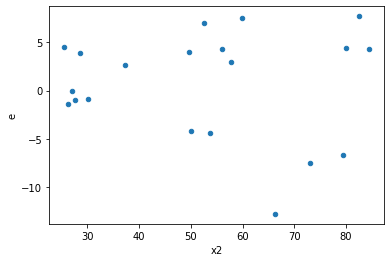

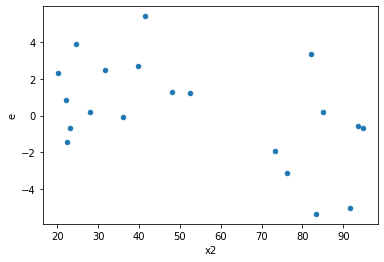

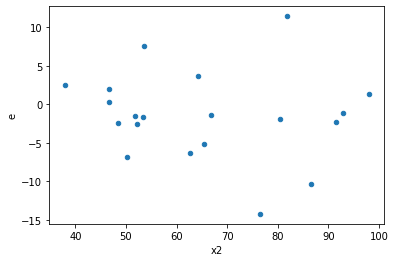

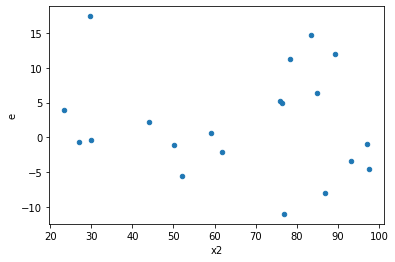

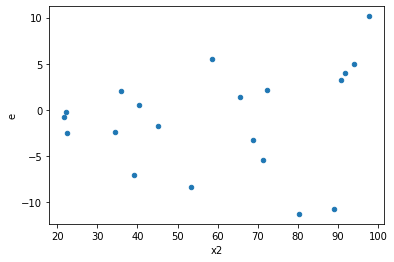

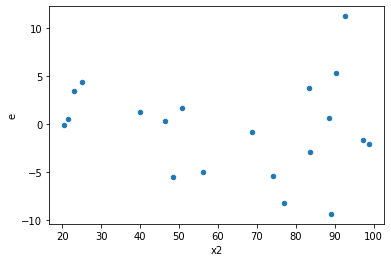

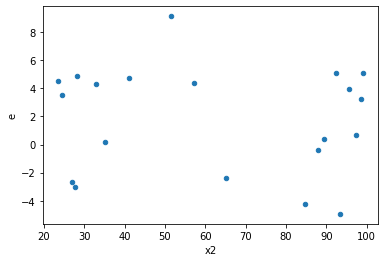

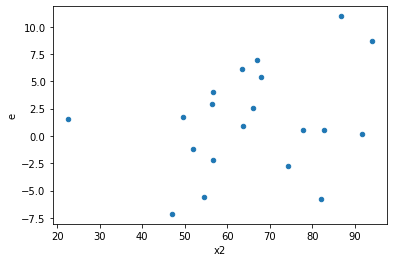

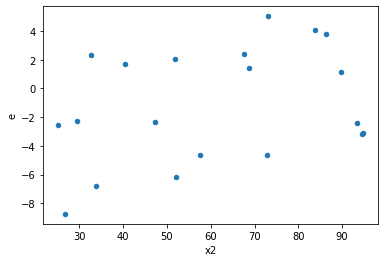

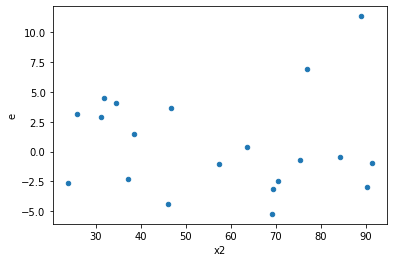

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,7.0,9.0,99.31214536900745,149.08633676765064,14.187449338429635,16.56514852973896,1.1675917308736274,0.8092259943340401,0.59538700283298,0.40461299716702004,Reject005=1 : Homoscedasticity
2.0,9.0,7.0,131.1296401385196,197.60655292578807,14.569960015391066,28.229507560826868,1.9375144153454404,0.3953551484744293,0.8023224257627853,0.19767757423721466,Reject005=1 : Homoscedasticity
3.0,10.0,6.0,112.02858822746765,77.41634399761995,11.202858822746766,12.902723999603325,1.1517349458519535,0.9010252542871089,0.5494873728564456,0.45051262714355444,Reject005=1 : Homoscedasticity
5.0,10.0,6.0,123.42161278524023,264.3501871101531,12.342161278524022,44.05836451835885,3.5697446763252563,0.1328677642811582,0.9335661178594209,0.0664338821405791,Reject005=1 : Homoscedasticity
6.0,5.0,11.0,41.29980641386035,249.34679399280822,8.259961282772071,22.667890362982565,2.744309517559281,0.15136119547567528,0.9243194022621624,0.07568059773783764,Reject005=1 : Homoscedasticity
9.0,4.0,12.0,53.43616325299352,165.1775575518159,13.35904081324838,13.764796462651326,1.0303731124917703,0.8619410750279375,0.5690294624860313,0.43097053751396874,Reject005=1 : Homoscedasticity
12.0,5.0,11.0,76.26469308579837,396.6309257350816,15.252938617159675,36.057356885007415,2.3639613185384887,0.2177705874183944,0.8911147062908028,0.1088852937091972,Reject005=1 : Homoscedasticity
13.0,5.0,11.0,227.92912969980827,643.2926041781864,45.58582593996165,58.48114583438058,1.2828800318634694,0.6763833807552753,0.6618083096223624,0.33819169037763763,Reject005=1 : Homoscedasticity
16.0,10.0,6.0,91.3475175745629,134.35337141344388,9.13475175745629,22.392228568907314,2.45132316273724,0.28458772543854227,0.8577061372807289,0.14229386271927114,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,9.0,99.31214536900745,149.08633676765064,14.187449338429635,16.56514852973896,1.1675917308736274,0.8092259943340401,Reject005=1 : Homoscedasticity
1.0,10.0,6.0,271.1968907474155,70.13387106697414,27.11968907474155,11.688978511162356,0.43101447361537465,0.2295692051201475,Reject005=1 : Homoscedasticity
2.0,9.0,7.0,131.1296401385196,197.60655292578807,14.569960015391066,28.229507560826868,1.9375144153454404,0.3953551484744293,Reject005=1 : Homoscedasticity
3.0,10.0,6.0,112.02858822746765,77.41634399761995,11.202858822746766,12.902723999603325,1.1517349458519535,0.9010252542871089,Reject005=1 : Homoscedasticity
4.0,13.0,3.0,170.0877101822481,10.399651243116915,13.083670014019084,3.466550414372305,0.2649524491719766,0.07577750334385956,Reject005=1 : Homoscedasticity
5.0,10.0,6.0,123.42161278524023,264.3501871101531,12.342161278524022,44.05836451835885,3.5697446763252563,0.1328677642811582,Reject005=1 : Homoscedasticity
6.0,5.0,11.0,41.29980641386035,249.34679399280822,8.259961282772071,22.667890362982565,2.744309517559281,0.15136119547567528,Reject005=1 : Homoscedasticity
7.0,11.0,5.0,492.3831247076496,170.0588176289845,44.762102246149965,34.0117635257969,0.7598339179595232,0.6521708856058255,Reject005=1 : Homoscedasticity
8.0,3.0,13.0,68.79238597484263,242.79466160033408,22.930795324947542,18.67651243079493,0.8144729463646571,0.9830813673291485,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      838
Reject005=0 : Heteroscedasticity    162
Name: Result_test, dtype: int64